In [17]:
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np

In [13]:
hr = pd.read_csv("/content/drive/MyDrive/Cases/human-resources-analytics/HR_comma_sep.csv")
hr.shape

(14995, 10)

In [14]:
dum_hr = pd.get_dummies(hr, drop_first=True)
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']

In [ ]:
x_gbm = XGBClassifier(random_state=23)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
print(x_gbm.get_params())

In [ ]:
params={'n_estimators':[50,75,100],
        'learning_rate':np.linspace(0.001, 0.7, 5),
        'max_depth':[None, 2, 3, 5]}
gcv = GridSearchCV(x_gbm, param_grid=params, cv=kfold, verbose=3, scoring='neg_log_loss')
gcv.fit(X, y)

In [16]:
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': 0.3505, 'max_depth': None, 'n_estimators': 100}
-0.051695106226993116


### Regression

In [18]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor

In [19]:
boston = pd.read_csv("/content/drive/MyDrive/Datasets/Boston.csv")
X = boston.drop('medv', axis=1)
y = boston['medv']

In [23]:
gbm = XGBRegressor(random_state=23)
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
params={'n_estimators':[50,75,100],
        'learning_rate':np.linspace(0.001, 0.7, 5),
        'max_depth':[None, 2, 3, 5]}
gcv = GridSearchCV(gbm, param_grid=params, cv=kfold, verbose=3)
gcv.fit(X, y)

[CV 3/5] END learning_rate=0.001, max_depth=None, n_estimators=100;, score=0.132 total time=   1.3s
[CV 4/5] END learning_rate=0.001, max_depth=None, n_estimators=100;, score=0.095 total time=   0.8s
[CV 5/5] END learning_rate=0.001, max_depth=None, n_estimators=100;, score=0.132 total time=   0.4s
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.069 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.061 total time=   0.0s
[CV 3/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.047 total time=   0.0s
[CV 4/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.031 total time=   0.0s
[CV 5/5] END learning_rate=0.001, max_depth=2, n_estimators=50;, score=0.047 total time=   0.0s
[CV 1/5] END learning_rate=0.001, max_depth=2, n_estimators=75;, score=0.100 total time=   0.0s
[CV 2/5] END learning_rate=0.001, max_depth=2, n_estimators=75;, score=0.092 total time=   0.0s
[CV 3/5] END learning_rate=0

GridSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=23, ...),
             param_grid={'learning_rate': array([0.001  , 0.17575, 0.3505 , 0.52525, 0.7    ]),
                         'max_depth': [None, 2, 3, 5],
                         'n_estimators': [50, 75, 100]},
             verbose=3)

In [21]:
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': 0.17575, 'max_depth': 5, 'n_estimators': 100}
0.8860641136188496


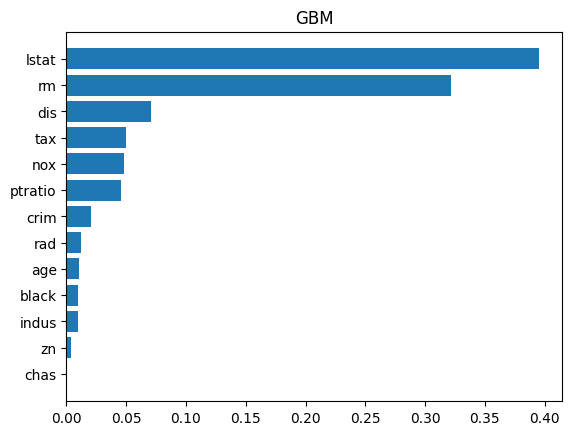

In [22]:
bm_gbm = gcv.best_estimator_
df_imp = pd.DataFrame({'Features':list(X.columns),
                       'Importance':bm_gbm.feature_importances_})
df_imp = df_imp[df_imp['Importance']>0].sort_values('Importance')
plt.barh(df_imp['Features'],df_imp['Importance'])
plt.title("GBM")
plt.show()